In [21]:
#Загружаем все бибилиотеки
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
#Преобразование формата в DataFrame - выгрузка датасета про вино 
wine = load_wine()

In [3]:
type(wine)

sklearn.utils.Bunch

In [4]:
#Датасет возвращается в виде словаря со следующими ключами
for x in wine:
    print(x)

data
target
frame
target_names
DESCR
feature_names


In [5]:
#Выведем все колонки датасета
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
#Преобразование в Pandas DataFrame
data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                   columns = wine['feature_names']+ ['target'])

In [7]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [8]:
#Узнаем типы данных каждого столбца
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [10]:
#Проверим количество пустых значений
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


In [11]:
#Производим коррелляционный анализ 
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [13]:
#Корелляционный анализ методом Спирмана
data.corr(method='spearman')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.140430,0.243722,-0.306598,0.365503,0.310920,0.294740,-0.162207,0.192734,0.635425,-0.024203,0.103050,0.633580,-0.354167
malic_acid,0.140430,1.000000,0.230674,0.304069,0.080188,-0.280225,-0.325202,0.255236,-0.244825,0.290307,-0.560265,-0.255185,-0.057466,0.346913
ash,0.243722,0.230674,1.000000,0.366374,0.361488,0.132193,0.078796,0.145583,0.024384,0.283047,-0.050183,-0.007500,0.253163,-0.053988
alcalinity_of_ash,-0.306598,0.304069,0.366374,1.000000,-0.169558,-0.376657,-0.443770,0.389390,-0.253695,-0.073776,-0.352507,-0.325890,-0.456090,0.569792
magnesium,0.365503,0.080188,0.361488,-0.169558,1.000000,0.246417,0.233167,-0.236786,0.173647,0.357029,0.036095,0.056963,0.507575,-0.250498
total_phenols,0.310920,-0.280225,0.132193,-0.376657,0.246417,1.000000,0.879404,-0.448013,0.666689,0.011162,0.439457,0.687207,0.419470,-0.726544
flavanoids,0.294740,-0.325202,0.078796,-0.443770,0.233167,0.879404,1.000000,-0.543897,0.730322,-0.042910,0.535430,0.741533,0.429904,-0.854908
nonflavanoid_phenols,-0.162207,0.255236,0.145583,0.389390,-0.236786,-0.448013,-0.543897,1.000000,-0.384629,0.059639,-0.267813,-0.494950,-0.270112,0.474205
proanthocyanins,0.192734,-0.244825,0.024384,-0.253695,0.173647,0.666689,0.730322,-0.384629,1.000000,-0.030947,0.342795,0.554031,0.308249,-0.570648
color_intensity,0.635425,0.290307,0.283047,-0.073776,0.357029,0.011162,-0.042910,0.059639,-0.030947,1.000000,-0.418522,-0.317516,0.457096,0.131170


In [22]:
#Используем тепловые карты для того, чтобы показать стеень корелляции различными цветами
sns.heatmap(data.corr())

<AxesSubplot:>

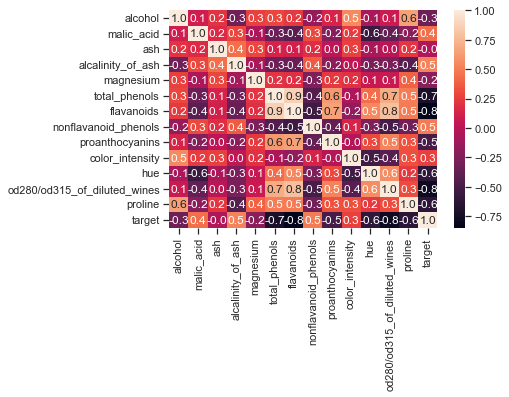

In [15]:
sns.heatmap(data.corr(), annot=True, fmt='.1f')

/var/folders/7p/qf20jzcs0857b0yp3vsrlzv00000gp/T/ipykernel_799/1935126924.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


<AxesSubplot:>

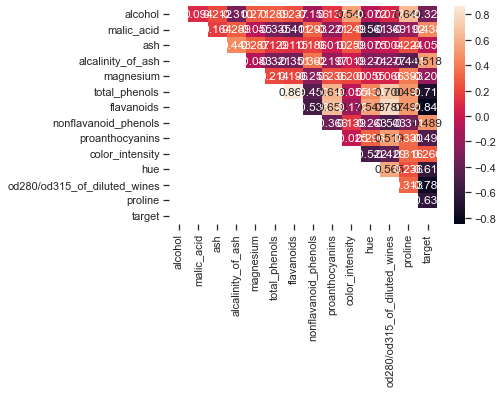

In [16]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

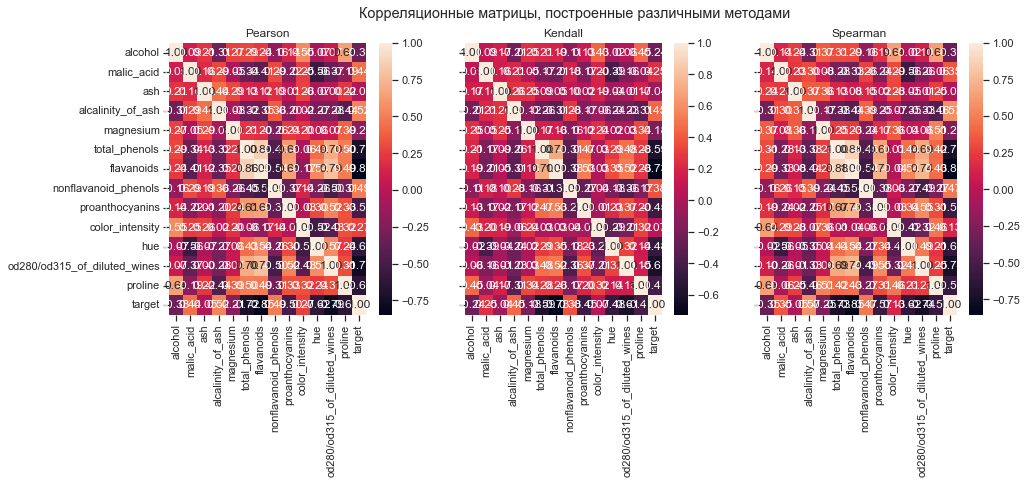

In [17]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

<AxesSubplot:>

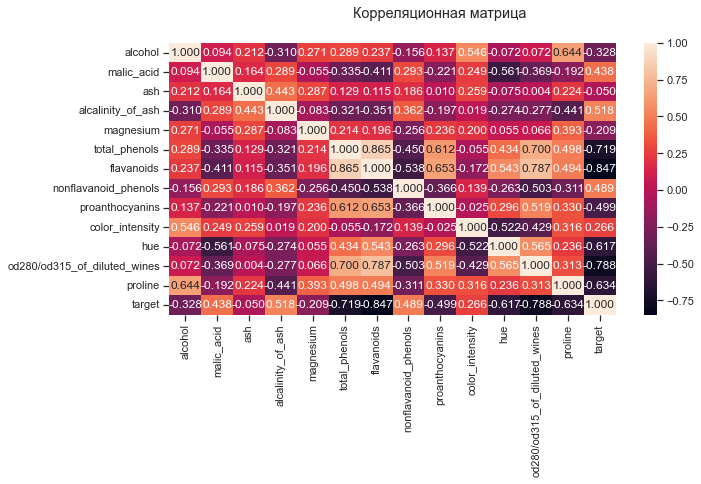

In [18]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')

<AxesSubplot:xlabel='malic_acid'>

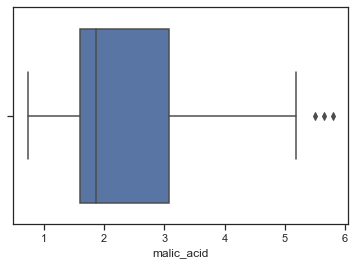

In [19]:
#Дополнительное задание для группы ИУ5-63Б - ящик с усами
sns.boxplot(x=data['malic_acid'])